#### import packages

In [1]:
import numpy as np
import xarray as xr
import netCDF4 as nc
import matplotlib.pyplot as plt
import os

#### clone repository

In [2]:
#clone repository
!git clone https://github.com/RobertPincus/RFMIP-IRF_intake_catalogue

Cloning into 'RFMIP-IRF_intake_catalogue'...
remote: Enumerating objects: 391, done.
remote: Counting objects: 100% (249/249), done.
remote: Compressing objects: 100% (136/136), done.
remote: Total 391 (delta 144), reused 197 (delta 113), pack-reused 142
Receiving objects: 100% (391/391), 2.34 MiB | 9.30 MiB/s, done.
Resolving deltas: 100% (226/226), done.


In [2]:
#copy directory here
os.chdir('/Users/emmalayton/Desktop/senior_thesis/RFMIP-IRF_intake_catalogue')

In [6]:
from intake import open_catalog
cat = open_catalog(os.getcwd() + '/main.yml')

#### calculate LBLRTM (benchmark) global mean flux

In [7]:
#shortwave calculation
LBLRTM_p1f1_rsu = cat.benchmark.LBLRTM.p1f1.rsu.to_dask() #upwelling sw radiation values
LBLRTM_p1f1_rsd = cat.benchmark.LBLRTM.p1f1.rsd.to_dask() #downwelling sw radiation values
pw_sw_LBLRTM = LBLRTM_p1f1_rsu.profile_weight.values #profile weights for each column

gbm_LBLRTM_p1f1_rsu = np.average(LBLRTM_p1f1_rsu.rsu, axis=1, weights=pw_sw_LBLRTM) #compute average across 100 columns
gbm_LBLRTM_p1f1_rsd = np.average(LBLRTM_p1f1_rsd.rsd, axis=1, weights=pw_sw_LBLRTM)

In [8]:
print(np.average(LBLRTM_p1f1_rsd.plev[:,0].values, weights=pw_sw_LBLRTM))
print(np.average(LBLRTM_p1f1_rsd.plev[:,60].values, weights=pw_sw_LBLRTM))

0.01
98620.87


In [9]:
#longwave calculation
LBLRTM_p1f1_rlu = cat.benchmark.LBLRTM.p1f1.rlu.to_dask() #upwelling lw radiation values
LBLRTM_p1f1_rld = cat.benchmark.LBLRTM.p1f1.rld.to_dask() #downwelling lw radiation values
pw_lw_LBLRTM = LBLRTM_p1f1_rlu.profile_weight.values #profile weights for each column

gbm_LBLRTM_p1f1_rlu = np.average(LBLRTM_p1f1_rlu.rlu, axis=1, weights=pw_lw_LBLRTM) #compute average across 100 columns
gbm_LBLRTM_p1f1_rld = np.average(LBLRTM_p1f1_rld.rld, axis=1, weights=pw_lw_LBLRTM)

In [10]:
#shortwave flux = downwelling - upwelling radiation
gbm_LBLRTM_p1f1_sw_flux = gbm_LBLRTM_p1f1_rsd-gbm_LBLRTM_p1f1_rsu 

gbm_LBLRTM_p1f1_sw_flux_forcing = np.zeros((18,61))

#calculate error in experiments 2-18 compared with the reference experiment 1
for i in range(1,18): 
    for j in range(61):
        gbm_LBLRTM_p1f1_sw_flux_forcing[0,:] = 0
        gbm_LBLRTM_p1f1_sw_flux_forcing[i,j] = gbm_LBLRTM_p1f1_sw_flux[i,j]-gbm_LBLRTM_p1f1_sw_flux[0,j]

In [11]:
#longwave flux = downwelling - upwelling radiation
gbm_LBLRTM_p1f1_lw_flux = gbm_LBLRTM_p1f1_rld-gbm_LBLRTM_p1f1_rlu 

gbm_LBLRTM_p1f1_lw_flux_forcing = np.zeros((18,61))

#calculate error in experiments 2-18 compared with the reference experiment 1
for i in range(1,18):
    for j in range(61):
        gbm_LBLRTM_p1f1_lw_flux_forcing[0,:] = 0
        gbm_LBLRTM_p1f1_lw_flux_forcing[i,j] = gbm_LBLRTM_p1f1_lw_flux[i,j]-gbm_LBLRTM_p1f1_lw_flux[0,j]

In [12]:
lblrtm_p1f1 = xr.DataArray(
    data=gbm_LBLRTM_p1f1_lw_flux_forcing,
    dims=["experiment", "level"],
    attrs=dict(
        description="Ambient temperature.",
        units="degC",
    ),
)

In [13]:
lblrtm_p1f1_lw = xr.DataArray(
    data=gbm_LBLRTM_p1f1_lw_flux_forcing,
    dims=["experiment", "level"],
    attrs=dict(
        description="Ambient temperature.",
        units="degC",
    ),
)

#### CanESM5 p2f2 (parameterized)

In [14]:
#shortwave calculation
CanESM5_p2f2_rsu = cat.parameterized.CanESM5.p2f2.rsu.to_dask() #upwelling sw radiation values
CanESM5_p2f2_rsd = cat.parameterized.CanESM5.p2f2.rsd.to_dask() #downwelling sw radiation values
pw_sw_CanESM5 = CanESM5_p2f2_rsu.profile_weight.values #profile weights for each column

gbm_CanESM5_p2f2_rsu = np.average(CanESM5_p2f2_rsu.rsu, axis=1, weights=pw_sw_CanESM5) #compute average across 100 columns
gbm_CanESM5_p2f2_rsd = np.average(CanESM5_p2f2_rsd.rsd, axis=1, weights=pw_sw_CanESM5)

In [15]:
#longwave calculation
CanESM5_p2f2_rlu = cat.parameterized.CanESM5.p2f2.rlu.to_dask() #upwelling lw radiation values
CanESM5_p2f2_rld = cat.parameterized.CanESM5.p2f2.rld.to_dask() #downwelling lw radiation values
pw_lw_CanESM5 = CanESM5_p2f2_rlu.profile_weight.values #profile weights for each column

gbm_CanESM5_p2f2_rlu = np.average(CanESM5_p2f2_rlu.rlu, axis=1, weights=pw_lw_CanESM5) #compute average across 100 columns
gbm_CanESM5_p2f2_rld = np.average(CanESM5_p2f2_rld.rld, axis=1, weights=pw_lw_CanESM5)

In [16]:
#shortwave flux = downwelling - upwelling radiation
gbm_CanESM5_p2f2_sw_flux = gbm_CanESM5_p2f2_rsd-gbm_CanESM5_p2f2_rsu 

gbm_CanESM5_p2f2_sw_flux_forcing = np.zeros((18,61))

#calculate error in experiments 2-18 compared with the reference experiment 1
for i in range(1,18):
    for j in range(61):
        gbm_CanESM5_p2f2_sw_flux_forcing[0,:] = 0
        gbm_CanESM5_p2f2_sw_flux_forcing[i,j] = gbm_CanESM5_p2f2_sw_flux[i,j]-gbm_CanESM5_p2f2_sw_flux[0,j]

In [17]:
#longwave flux = downwelling - upwelling radiation
gbm_CanESM5_p2f2_lw_flux = gbm_CanESM5_p2f2_rld-gbm_CanESM5_p2f2_rlu 

gbm_CanESM5_p2f2_lw_flux_forcing = np.zeros((18,61))

#calculate error in experiments 2-18 compared with the reference experiment 1
for i in range(1,18):
    for j in range(61):
        gbm_CanESM5_p2f2_lw_flux_forcing[0,:] = 0
        gbm_CanESM5_p2f2_lw_flux_forcing[i,j] = gbm_CanESM5_p2f2_lw_flux[i,j]-gbm_CanESM5_p2f2_lw_flux[0,j]

In [18]:
canesm5_p2f2 = xr.DataArray(
    data=gbm_CanESM5_p2f2_lw_flux_forcing-gbm_LBLRTM_p1f1_sw_flux_forcing,
    dims=["experiment", "level"],
    attrs=dict(
        description="Ambient temperature.",
        units="degC",
    ),
)

In [19]:
canesm5_p2f2_lw = xr.DataArray(
    data=gbm_CanESM5_p2f2_lw_flux_forcing-gbm_LBLRTM_p1f1_lw_flux_forcing,
    dims=["experiment", "level"],
    attrs=dict(
        description="Ambient temperature.",
        units="degC",
    ),
)

#### GISS E2 (parameterized)

In [20]:
#shortwave calculation
GISS_E2_1_G_p1f1_rsu = cat.parameterized.GISS_E2.p1f1.rsu.to_dask() #upwelling sw radiation values
GISS_E2_1_G_p1f1_rsd = cat.parameterized.GISS_E2.p1f1.rsd.to_dask() #upwelling sw radiation values
pw_sw_GISS_E2 = GISS_E2_1_G_p1f1_rsu.profile_weight.values #profile weights for each column

gbm_GISS_E2_1_G_p1f1_rsu = np.average(GISS_E2_1_G_p1f1_rsu.rsu, axis=1, weights=pw_sw_GISS_E2) #compute average across 100 columns
gbm_GISS_E2_1_G_p1f1_rsd = np.average(GISS_E2_1_G_p1f1_rsd.rsd, axis=1, weights=pw_sw_GISS_E2)

In [22]:
#longwave calculation
GISS_E2_1_G_p1f1_rlu = cat.parameterized.GISS_E2.p1f1.rlu.to_dask() #upwelling sw radiation values
GISS_E2_1_G_p1f1_rld = cat.parameterized.GISS_E2.p1f1.rld.to_dask() #upwelling sw radiation values
pw_lw_GISS_E2 = GISS_E2_1_G_p1f1_rlu.profile_weight.values #profile weights for each column

gbm_GISS_E2_1_G_p1f1_rlu = np.average(GISS_E2_1_G_p1f1_rlu.rlu, axis=1, weights=pw_lw_GISS_E2) #compute average across 100 columns
gbm_GISS_E2_1_G_p1f1_rld = np.average(GISS_E2_1_G_p1f1_rld.rld, axis=1, weights=pw_lw_GISS_E2)

In [23]:
#shortwave flux = downwelling - upwelling radiation
gbm_GISS_E2_1_G_p1f1_sw_flux = gbm_GISS_E2_1_G_p1f1_rsd-gbm_GISS_E2_1_G_p1f1_rsu 

gbm_GISS_E2_1_G_p1f1_sw_flux_forcing = np.zeros((18,61))

#calculate error in experiments 2-18 compared with the reference experiment 1
for i in range(1,18):
    for j in range(61):
        gbm_GISS_E2_1_G_p1f1_sw_flux_forcing[0,:] = 0
        gbm_GISS_E2_1_G_p1f1_sw_flux_forcing[i,j] = gbm_GISS_E2_1_G_p1f1_sw_flux[i,j]-gbm_GISS_E2_1_G_p1f1_sw_flux[0,j]

In [24]:
#longwave flux = downwelling - upwelling radiation
gbm_GISS_E2_1_G_p1f1_lw_flux = gbm_GISS_E2_1_G_p1f1_rld-gbm_GISS_E2_1_G_p1f1_rlu 

gbm_GISS_E2_1_G_p1f1_lw_flux_forcing = np.zeros((18,61))

#calculate error in experiments 2-18 compared with the reference experiment 1
for i in range(1,18):
    for j in range(61):
        gbm_GISS_E2_1_G_p1f1_lw_flux_forcing[0,:] = 0
        gbm_GISS_E2_1_G_p1f1_lw_flux_forcing[i,j] = gbm_GISS_E2_1_G_p1f1_lw_flux[i,j]-gbm_GISS_E2_1_G_p1f1_lw_flux[0,j]

In [25]:
giss_e2_1_g_p1f1 = xr.DataArray(
    data=gbm_GISS_E2_1_G_p1f1_sw_flux_forcing-gbm_LBLRTM_p1f1_sw_flux_forcing,
    dims=["experiment", "level"],
    attrs=dict(
        description="Ambient temperature.",
        units="degC",
    ),
)

In [26]:
giss_e2_1_g_p1f1_lw = xr.DataArray(
    data=gbm_GISS_E2_1_G_p1f1_lw_flux_forcing-gbm_LBLRTM_p1f1_lw_flux_forcing,
    dims=["experiment", "level"],
    attrs=dict(
        description="Ambient temperature.",
        units="degC",
    ),
)

#### GISS E3 (parameterized) 

In [27]:
#shortwave calculation
GISS_E3_G_p1f1_rsu = cat.parameterized.GISS_E3.p1f1.rsu.to_dask() #upwelling sw radiation values
GISS_E3_G_p1f1_rsd = cat.parameterized.GISS_E3.p1f1.rsd.to_dask() #upwelling sw radiation values
pw_sw_GISS_E3 = GISS_E3_G_p1f1_rsu.profile_weight.values #profile weights for each column

gbm_GISS_E3_G_p1f1_rsu = np.average(GISS_E3_G_p1f1_rsu.rsu, axis=1, weights=pw_sw_GISS_E3) #compute average across 100 columns
gbm_GISS_E3_G_p1f1_rsd = np.average(GISS_E3_G_p1f1_rsd.rsd, axis=1, weights=pw_sw_GISS_E3)

In [28]:
#longwave calculation
GISS_E3_G_p1f1_rlu = cat.parameterized.GISS_E3.p1f1.rlu.to_dask() #upwelling sw radiation values
GISS_E3_G_p1f1_rld = cat.parameterized.GISS_E3.p1f1.rld.to_dask() #upwelling sw radiation values
pw_lw_GISS_E3 = GISS_E3_G_p1f1_rlu.profile_weight.values #profile weights for each column

gbm_GISS_E3_G_p1f1_rlu = np.average(GISS_E3_G_p1f1_rlu.rlu, axis=1, weights=pw_lw_GISS_E3) #compute average across 100 columns
gbm_GISS_E3_G_p1f1_rld = np.average(GISS_E3_G_p1f1_rld.rld, axis=1, weights=pw_lw_GISS_E3)

In [29]:
#shortwave flux = downwelling - upwelling radiation
gbm_GISS_E3_G_p1f1_sw_flux = gbm_GISS_E3_G_p1f1_rsd-gbm_GISS_E3_G_p1f1_rsu 

gbm_GISS_E3_G_p1f1_sw_flux_forcing = np.zeros((18,61))

#calculate error in experiments 2-18 compared with the reference experiment 1
for i in range(1,18):
    for j in range(61):
        gbm_GISS_E3_G_p1f1_sw_flux_forcing[0,:] = 0
        gbm_GISS_E3_G_p1f1_sw_flux_forcing[i,j] = gbm_GISS_E3_G_p1f1_sw_flux[i,j]-gbm_GISS_E3_G_p1f1_sw_flux[0,j]

In [30]:
#longwave flux = downwelling - upwelling radiation
gbm_GISS_E3_G_p1f1_lw_flux = gbm_GISS_E3_G_p1f1_rld-gbm_GISS_E3_G_p1f1_rlu 

gbm_GISS_E3_G_p1f1_lw_flux_forcing = np.zeros((18,61))

#calculate error in experiments 2-18 compared with the reference experiment 1
for i in range(1,18):
    for j in range(61):
        gbm_GISS_E3_G_p1f1_lw_flux_forcing[0,:] = 0
        gbm_GISS_E3_G_p1f1_lw_flux_forcing[i,j] = gbm_GISS_E3_G_p1f1_lw_flux[i,j]-gbm_GISS_E3_G_p1f1_lw_flux[0,j]

In [31]:
giss_e3_g_p1f1 = xr.DataArray(
    data=gbm_GISS_E3_G_p1f1_sw_flux_forcing-gbm_LBLRTM_p1f1_sw_flux_forcing,
    dims=["experiment", "level"],
    attrs=dict(
        description="Ambient temperature.",
        units="degC",
    ),
)

In [32]:
giss_e3_g_p1f1_lw = xr.DataArray(
    data=gbm_GISS_E3_G_p1f1_lw_flux_forcing-gbm_LBLRTM_p1f1_lw_flux_forcing,
    dims=["experiment", "level"],
    attrs=dict(
        description="Ambient temperature.",
        units="degC",
    ),
)

#### MIROC6 (parameterized)

In [33]:
#shortwave calculation
MIROC6_p1f1_rsu = cat.parameterized.MIROC6.p1f1.rsu.to_dask() #upwelling sw radiation values
MIROC6_p1f1_rsd = cat.parameterized.MIROC6.p1f1.rsd.to_dask() #downwelling sw radiation values
pw_sw_MIROC6 = MIROC6_p1f1_rsu.profile_weight.values #profile weights for each column

gbm_MIROC6_p1f1_rsu = np.average(MIROC6_p1f1_rsu.rsu, axis=1, weights=pw_sw_MIROC6) #compute average across 100 columns
gbm_MIROC6_p1f1_rsd = np.average(MIROC6_p1f1_rsd.rsd, axis=1, weights=pw_sw_MIROC6) 

In [35]:
#longwave calculation
MIROC6_p1f1_rlu = cat.parameterized.MIROC6.p1f1.rlu.to_dask() #upwelling lw radiation values
MIROC6_p1f1_rld = cat.parameterized.MIROC6.p1f1.rld.to_dask() #downwelling lw radiation values
pw_lw_MIROC6 = MIROC6_p1f1_rlu.profile_weight.values #profile weights for each column

gbm_MIROC6_p1f1_rlu = np.average(MIROC6_p1f1_rlu.rlu, axis=1, weights=pw_lw_MIROC6) #compute average across 100 columns
gbm_MIROC6_p1f1_rld = np.average(MIROC6_p1f1_rld.rld, axis=1, weights=pw_lw_MIROC6)

In [36]:
#shortwave flux = downwelling - upwelling radiation
gbm_MIROC6_p1f1_sw_flux = gbm_MIROC6_p1f1_rsd-gbm_MIROC6_p1f1_rsu 

gbm_MIROC6_p1f1_sw_flux_forcing = np.zeros((18,61))

#calculate error in experiments 2-18 compared with the reference experiment 1
for i in range(1,18):
    for j in range(61):
        gbm_MIROC6_p1f1_sw_flux_forcing[0,:] = 0
        gbm_MIROC6_p1f1_sw_flux_forcing[i,j] = gbm_MIROC6_p1f1_sw_flux[i,j]-gbm_MIROC6_p1f1_sw_flux[0,j]

In [37]:
#longwave flux = downwelling - upwelling radiation
gbm_MIROC6_p1f1_lw_flux = gbm_MIROC6_p1f1_rld-gbm_MIROC6_p1f1_rlu 

gbm_MIROC6_p1f1_lw_flux_forcing = np.zeros((18,61))

#calculate error in experiments 2-18 compared with the reference experiment 1
for i in range(1,18):
    for j in range(61):
        gbm_MIROC6_p1f1_lw_flux_forcing[0,:] = 0
        gbm_MIROC6_p1f1_lw_flux_forcing[i,j] = gbm_MIROC6_p1f1_lw_flux[i,j]-gbm_MIROC6_p1f1_lw_flux[0,j]

In [38]:
miroc6_p1f1 = xr.DataArray(
    data=gbm_MIROC6_p1f1_sw_flux_forcing-gbm_LBLRTM_p1f1_sw_flux_forcing,
    dims=["experiment", "level"],
    attrs=dict(
        description="Ambient temperature.",
        units="degC",
    ),
)

In [39]:
miroc6_p1f1_lw = xr.DataArray(
    data=gbm_MIROC6_p1f1_lw_flux_forcing-gbm_LBLRTM_p1f1_lw_flux_forcing,
    dims=["experiment", "level"],
    attrs=dict(
        description="Ambient temperature.",
        units="degC",
    ),
)

#### GFDL (parameterized)

In [42]:
#shortwave calculation
GFDL_p1f2_rsu = cat.parameterized.GFDL.p1f2.rsu.to_dask() #upwelling sw radiation values
GFDL_p1f2_rsd = cat.parameterized.GFDL.p1f2.rsd.to_dask() #downwelling sw radiation values
pw_sw_GFDL = GFDL_p1f2_rsu.profile_weight.values #profile weights for each column

gbm_GFDL_p1f2_rsu = np.average(GFDL_p1f2_rsu.rsu, axis=1, weights=pw_sw_GFDL) #compute average across 100 columns
gbm_GFDL_p1f2_rsd = np.average(GFDL_p1f2_rsd.rsd, axis=1, weights=pw_sw_GFDL)

In [43]:
#longwave calculation
GFDL_p1f2_rlu = cat.parameterized.GFDL.p1f2.rlu.to_dask() #upwelling lw radiation values
GFDL_p1f2_rld = cat.parameterized.GFDL.p1f2.rld.to_dask() #downwelling lw radiation values
pw_lw_GFDL = GFDL_p1f2_rlu.profile_weight.values #profile weights for each column

gbm_GFDL_p1f2_rlu = np.average(GFDL_p1f2_rlu.rlu, axis=1, weights=pw_lw_GFDL) #compute average across 100 columns
gbm_GFDL_p1f2_rld = np.average(GFDL_p1f2_rld.rld, axis=1, weights=pw_lw_GFDL)

In [47]:
#shortwave flux = downwelling - upwelling radiation
gbm_GFDL_p1f2_sw_flux = gbm_GFDL_p1f2_rsd-gbm_GFDL_p1f2_rsu 

gbm_GFDL_p1f2_sw_flux_forcing = np.zeros((18,61))

#calculate error in experiments 2-18 compared with the reference experiment 1
for i in range(1,18):
    for j in range(61):
        gbm_GFDL_p1f2_sw_flux_forcing[0,:] = 0
        gbm_GFDL_p1f2_sw_flux_forcing[i,j] = gbm_GFDL_p1f2_sw_flux[i,j]-gbm_GFDL_p1f2_sw_flux[0,j]

In [48]:
#longwave flux = downwelling - upwelling radiation
gbm_GFDL_p1f2_lw_flux = gbm_GFDL_p1f2_rld-gbm_GFDL_p1f2_rlu 

gbm_GFDL_p1f2_lw_flux_forcing = np.zeros((18,61))

#calculate error in experiments 2-18 compared with the reference experiment 1
for i in range(1,18): 
    gbm_GFDL_p1f2_lw_flux_forcing[0] = 0
    gbm_GFDL_p1f2_lw_flux_forcing[i] = gbm_GFDL_p1f2_lw_flux[i,0]-gbm_GFDL_p1f2_lw_flux[0,0]

In [49]:
gfdl_p1f2 = xr.DataArray(
    data=gbm_GFDL_p1f2_sw_flux_forcing-gbm_LBLRTM_p1f1_sw_flux_forcing,
    dims=["experiment", "level"],
    attrs=dict(
        description="Ambient temperature.",
        units="degC",
    ),
)

In [50]:
gfdl_p1f2_lw = xr.DataArray(
    data=gbm_GFDL_p1f2_lw_flux_forcing-gbm_LBLRTM_p1f1_lw_flux_forcing,
    dims=["experiment", "level"],
    attrs=dict(
        description="Ambient temperature.",
        units="degC",
    ),
)

#### RTE_RRTMGP (parameterized) (longwave only)

In [51]:
#longwave calculation
RTE_RRTMGP_p1f1_rlu = cat.parameterized.RTE_RRTMGP.p1f1.rlu.to_dask() #upwelling sw radiation values
RTE_RRTMGP_p1f1_rld = cat.parameterized.RTE_RRTMGP.p1f1.rld.to_dask() #downwelling sw radiation values
pw_lw_RTE_RRTMGP = RTE_RRTMGP_p1f1_rlu.profile_weight.values #profile weights for each column

gbm_RTE_RRTMGP_p1f1_rlu = np.average(RTE_RRTMGP_p1f1_rlu.rlu, axis=1, weights=pw_lw_RTE_RRTMGP) #compute average across 100 columns
gbm_RTE_RRTMGP_p1f1_rld = np.average(RTE_RRTMGP_p1f1_rld.rld, axis=1, weights=pw_lw_RTE_RRTMGP)

In [52]:
#longwave flux = downwelling - upwelling radiation
gbm_RTE_RRTMGP_p1f1_lw_flux = gbm_RTE_RRTMGP_p1f1_rld-gbm_RTE_RRTMGP_p1f1_rlu 

gbm_RTE_RRTMGP_p1f1_lw_flux_forcing = np.zeros((18,61))

#calculate error in experiments 2-18 compared with the reference experiment 1
for i in range(1,18):
    for j in range(61):
        gbm_RTE_RRTMGP_p1f1_lw_flux_forcing[0,:] = 0
        gbm_RTE_RRTMGP_p1f1_lw_flux_forcing[i,j] = gbm_RTE_RRTMGP_p1f1_lw_flux[i,j]-gbm_RTE_RRTMGP_p1f1_lw_flux[0,j]

In [53]:
rte_rrtmgp_p1f1_lw = xr.DataArray(
    data=gbm_RTE_RRTMGP_p1f1_lw_flux_forcing-gbm_LBLRTM_p1f1_lw_flux_forcing,
    dims=["experiment", "level"],
    attrs=dict(
        description="Ambient temperature.",
        units="degC",
    ),
)

#### shortwave dataset creation

In [54]:
gbm_sw_flux_error_data = xr.concat((lblrtm_p1f1, miroc6_p1f1, gfdl_p1f2, canesm5_p2f2, giss_e2_1_g_p1f1, giss_e3_g_p1f1), dim="model")

In [55]:
model = ["LBLRTM", "MIROC6", "GFDL", "CanESM5"]
experiment = range(18)
level = range(61)

In [56]:
gbm_sw_flux_error_DS = xr.Dataset(
    data_vars=dict(
        gbm_sw_flux_error = (["model", "experiment", "level"], gbm_sw_flux_error_data.data)
           ),
    attrs=dict(description="rad-irf flux experiment error data."),
)

#### longwave dataset creation

In [57]:
gbm_lw_flux_error_data = xr.concat((lblrtm_p1f1_lw, miroc6_p1f1_lw, gfdl_p1f2_lw, rte_rrtmgp_p1f1_lw, canesm5_p2f2_lw, giss_e2_1_g_p1f1_lw, giss_e3_g_p1f1_lw), dim="model")

In [58]:
model = ["LBLRTM", "MIROC6", "GFDL", "RTE_RRTMGP", "CanESM5"]
experiment = range(18)
level = range(61)

In [59]:
gbm_lw_flux_error_DS = xr.Dataset(
    data_vars=dict(
        gbm_lw_flux_error = (["model", "experiment", "level"], gbm_lw_flux_error_data.data)
           ),
    attrs=dict(description="rad-irf flux experiment error data."),
)

#### plot parameterized model error

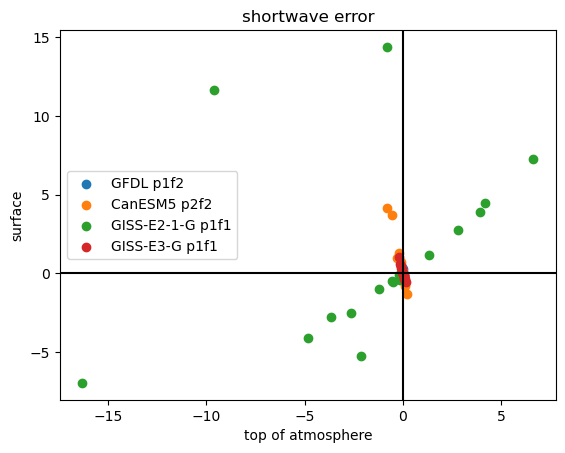

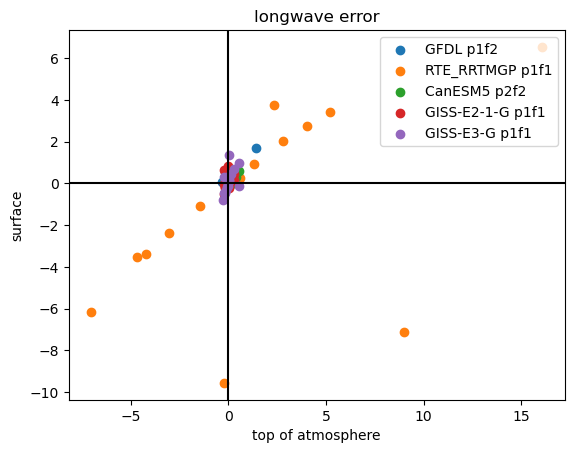

In [101]:
fig2, ax2 = plt.subplots()
for i in range(1,5):
    plt.scatter(gbm_sw_flux_error_data[i,:,0], gbm_sw_flux_error_data[i,:,60])
plt.xlabel("top of atmosphere")
plt.ylabel("surface")
ax2.axhline(y=0, color='k')
ax2.axvline(x=0, color='k')
plt.legend(["GFDL p1f2", "CanESM5 p2f2", "GISS-E2-1-G p1f1", "GISS-E3-G p1f1"])
plt.title("shortwave error")
plt.show()

fig3, ax3 = plt.subplots()
for i in range(1,6):
    plt.scatter(gbm_lw_flux_error_data[i,:,0], gbm_lw_flux_error_data[i,:,60])
plt.xlabel("top of atmosphere")
plt.ylabel("surface")
ax3.axhline(y=0, color='k')
ax3.axvline(x=0, color='k')
plt.legend(["GFDL p1f2", "RTE_RRTMGP p1f1", "CanESM5 p2f2", "GISS-E2-1-G p1f1", "GISS-E3-G p1f1"])
plt.title("longwave error")
plt.show()

#### plot parameterized model error in CO2 experiments

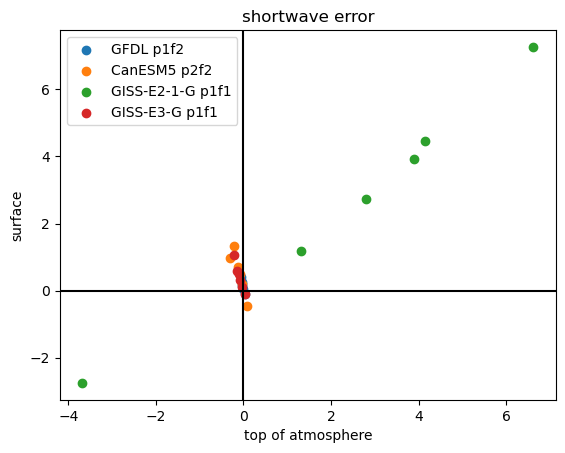

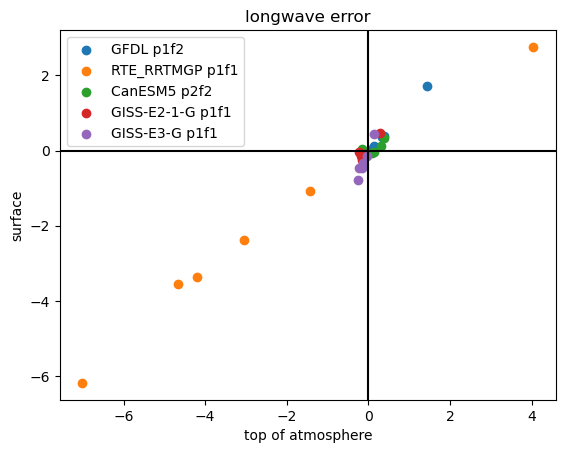

In [103]:
fig, ax = plt.subplots()
for i in range(1,5):
    plt.scatter(gbm_sw_flux_error_data[i,2:8,0], gbm_sw_flux_error_data[i,2:8,60])
plt.xlabel("top of atmosphere")
plt.ylabel("surface")
ax.axhline(y=0, color='k')
ax.axvline(x=0, color='k')
plt.legend(["GFDL p1f2", "CanESM5 p2f2", "GISS-E2-1-G p1f1", "GISS-E3-G p1f1"])
plt.title("shortwave error")
plt.show()

fig1, ax1 = plt.subplots()
for i in range(1,6):
    plt.scatter(gbm_lw_flux_error_data[i,2:8,0], gbm_lw_flux_error_data[i,2:8,60])
    plt.xlabel("top of atmosphere")
plt.ylabel("surface")
ax1.axhline(y=0, color='k')
ax1.axvline(x=0, color='k')
plt.legend(["GFDL p1f2", "RTE_RRTMGP p1f1", "CanESM5 p2f2", "GISS-E2-1-G p1f1", "GISS-E3-G p1f1"])
plt.title("longwave error")
plt.show()

# write the above functions as a loop:
for model in list(cat.parameterized):
    for variant in list(cat.parameterized.model):
        gbm_errors[model + "_" + variant] = global_mean_error_function(model, variant)
        
global_mean_error_function(model, variant):
    one_set_of_errors = {}
    for field in ["rlu", "rld", "rsu", "rsd"]:
        compute_global_mean_error（cat.parameterized.[model].[variant].[field].to_dask())
        
gcm_errors[model_variant]["field"]

for model in gcm_errors.keys()
    plt.scatter(model.rsd[0]-model.rsu[0], model.rsd[60]-model.rsu[60])
    

In [62]:
def gbm_error_function(model, variant):
    model = model
    variant = variant
    errors = {}
    for field in ["rlu", "rld", "rsu", "rsd"]:
        calc[field] = cat.parameterized.field.to_dask()
        pw_calc = calc.profile_weight_values
        gbm_pw_calc = np.average(calc.field, axis=1, weights=pw_calc)

In [63]:
for model in list(cat.parameterized):
    for variant in list(cat.parameterized.model):
        gbm_errors[model + "_" + variant] = gbm_error_function(model,variant)

AttributeError: model